## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

BSD-3 License

### import necessary packages


In [108]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline


### decide whether or not to save figures and data for MATLAB


In [109]:
saveFig = True
saveMat = True

### import the .mat data files

In [110]:

mat1 = loadmat('693ffd_compareResponse_block_1_changePts_noDelay.mat',squeeze_me=1)
mat2 = loadmat('693ffd_compareResponse_block_2_changePts_noDelay.mat',squeeze_me=1)
mat3 = loadmat('c19968_compareResponse_block_1_changePts_noDelay.mat',squeeze_me=1)
mat4 = loadmat('c19968_compareResponse_block_2_changePts_noDelay.mat',squeeze_me=1)
mat5 = loadmat('acabb1_compareResponse_changePts_noDelay.mat',squeeze_me=1)
mat6 = loadmat('2fd831_compareResponse_block_1_changePts_noDelay.mat',squeeze_me=1)
mat7 = loadmat('2fd831_compareResponse_block_2_changePts_noDelay.mat',squeeze_me=1)


### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

In [111]:
respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']
button3 = mat3['buttonLocs']
button4 = mat4['buttonLocs']
button6 = mat6['buttonLocs']
button7 = mat7['buttonLocs']


### prepare for pandas data frame


In [112]:
a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}
a= np.arange(0,button3.shape[0])
ndata3 = {n: 1e3*button3[n] for n in a}
a = np.arange(0,button4.shape[0])
ndata4 = {n: 1e3*button4[n] for n in a}
your_keys = {'cort','difference'}
ndata5 = {your_key: mat5[your_key] for your_key in your_keys}
a= np.arange(0,button6.shape[0])
ndata6 = {n: 1e3*button6[n] for n in a}
a = np.arange(0,button7.shape[0])
ndata7 = {n: 1e3*button7[n] for n in a}
#ndata6[1] = np.append(ndata6[1],np.nan)
#ndata7[1] = np.append(ndata7[1],np.nan)

### make pandas dataframes


In [113]:
dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict3 = pd.DataFrame.from_dict(ndata3,orient='columns')
dataFdict4 = pd.DataFrame.from_dict(ndata4,orient='columns')
dataFdict_5_1 = pd.DataFrame(ndata5['cort'],columns=['200 ms '])
dataFdict_5_2 = pd.DataFrame(ndata5['difference'],columns=['touch'])
dataFdict5 = pd.concat([dataFdict_5_1,dataFdict_5_2])
dataFdict6 = pd.DataFrame.from_dict(ndata6,orient='columns')
dataFdict7 = pd.DataFrame.from_dict(ndata7,orient='columns')

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


### assign columns for dataframes


In [114]:
dataFdict1.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict2.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict3.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict4.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict6.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']
dataFdict7.columns = ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = '693ffd'
dataMelt1['Subject'] = '3'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = '693ffd'
dataMelt2['Subject'] = '3'
dataMelt2['block'] = '2'
             
dataMelt3 = pd.melt(dataFdict3)
#dataMelt3['Subject'] = 'c19968'
dataMelt3['Subject'] = '2'
dataMelt3['block'] = '1'

dataMelt4 = pd.melt(dataFdict4)
#dataMelt4['Subject'] = 'c19968'
dataMelt4['Subject'] = '2'
dataMelt4['block'] = '2'

dataMelt5 = pd.melt(dataFdict5)
#dataMelt5['Subject'] = 'acabb1'
dataMelt5['Subject'] = '1'
dataMelt5['block'] = '1'

dataMelt6 = pd.melt(dataFdict6)
#dataMelt6['Subject'] = '2fd831'
dataMelt6['Subject'] = '4'
dataMelt6['block'] = '1'
dataMelt7 = pd.melt(dataFdict7)
#dataMelt7['Subject'] = '2fd831'
dataMelt7['Subject'] = '4'
dataMelt7['block'] = '2'

dataMelt1.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt3.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt4.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt5.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)

dataMelt6.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)
dataMelt7.rename(columns = {'variable':'experiment','value':'response time (ms)'}, inplace = True)


### concatenate

In [115]:
frames = [dataMelt1,dataMelt2,dataMelt3,dataMelt4,dataMelt5,dataMelt6,dataMelt7]

result = pd.concat(frames)
result
resultTrim = result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]
resultTrim.groupby(['experiment','Subject','block']).mean()

experimentsOfInt =  ['touch','no stimulation','off target','100 ms ','200 ms ','400 ms ','800 ms ']

### look at various metrics of interest


In [116]:
#dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]
dataCleaned = resultTrim
pd.options.display.float_format = '{:,.0f}'.format

dataCleaned.groupby(['experiment','Subject','block']).mean()
dataCleaned.groupby(['experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

response time (ms)                             
                                    count mean std min 25% 50% 75% max
Subject experiment                                                    
1       200 ms                         81  472  78 348 422 459 495 821
        touch                          73  332 108 169 254 313 374 719
2       100 ms                         36  292  86 182 232 277 314 551
        200 ms                         40  258  33 188 235 254 276 372
        400 ms                         40  266  42 169 244 261 288 380
        800 ms                         40  270  56 180 234 265 291 488
        no stimulation                  1  449 nan 449 449 449 449 449
        touch                          38  228 102 151 189 198 228 726
3       100 ms                          1  514 nan 514 514 514 514 514
        200 ms                          9  462  56 403 409 442 494 553
        400 ms                         26  539 105 383 455 515 603 747
        800 ms                         31  618 202 348 466 528 806 994
        off target                      1  484 nan 484 484 484 484 484
        touch                          30  258 109 151 169 222 318 507
4       100 ms                          3  408 327 218 219 220 503 786
        200 ms                         13  461 187 213 347 408 595 754
        400 ms                         17  486 152 305 371 423 588 857
        800 ms                         22  481 189 240 334 400 624 882
        touch                          19  247 120 153 178 201 234 556

### Now exclude off-target and null stimulation from further plots

In [117]:
experimentsOfInt =  ['touch','100 ms ','200 ms ','400 ms ','800 ms ']
dataCleaned = resultTrim[resultTrim['experiment'].isin(experimentsOfInt)]


### Now we will prepare the figures 

In [118]:
# set the color palette 

color_pal=sns.choose_colorbrewer_palette('qualitative')

#use set 1

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Paste…

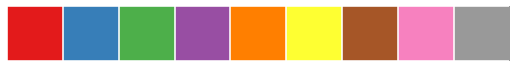

In [119]:
# observe color palette 

sns.palplot(color_pal)
color_pal_3 = color_pal[0:4]
color_pal_2 = color_pal[3:5]
color_pal_2_v2 = color_pal[6:8]

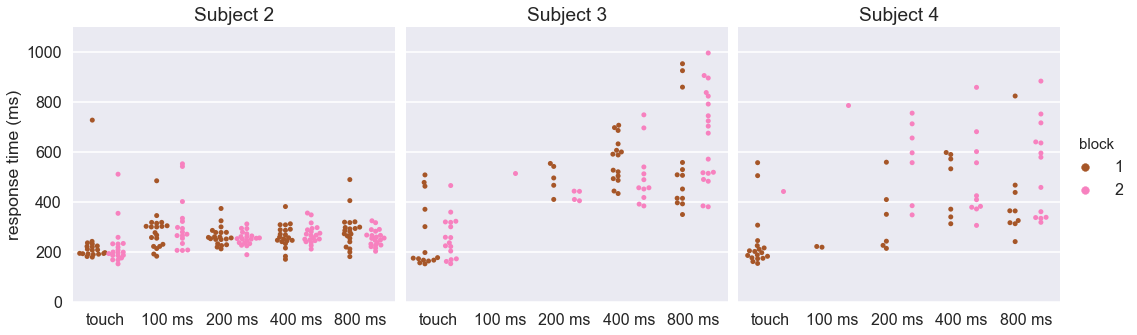

In [120]:
figBlock = sns.factorplot(x="experiment", y="response time (ms)", hue="block",size=5,aspect=1,
...                   col="Subject", data=dataCleaned,kind="swarm",dodge="True",col_order=['2','3','4'],
...                   order=['touch','100 ms ','200 ms ','400 ms ','800 ms '],
...                   palette=color_pal_2_v2)
plt.ylim([0,1100])

figBlock.axes[0,0].set_title('Subject 2')
figBlock.axes[0,1].set_title('Subject 3')
figBlock.axes[0,2].set_title('Subject 4')

figBlock.axes[0,0].set_xlabel('')
figBlock.axes[0,1].set_xlabel('')
figBlock.axes[0,2].set_xlabel('')

if saveFig:
    figBlock.savefig('swarmByBlockSplit_subj4_ND_CP.svg', dpi=600)
    figBlock.savefig('swarmByBlockSplit_subj4_ND_CP.png', dpi=600)

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


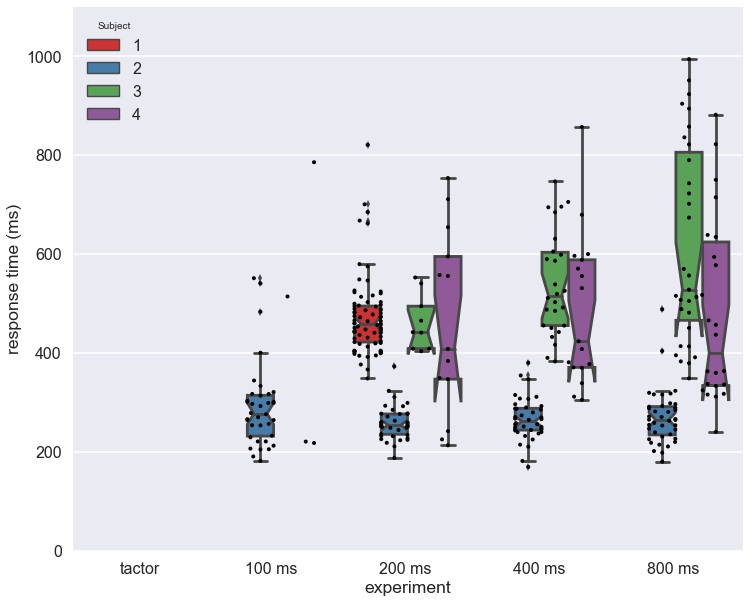

In [121]:
resultTrim_forBox = resultTrim[~(resultTrim['Subject'].isin(['3','4']) & (resultTrim['experiment'].isin(['100 ms '])))]
result[(result['response time (ms)'] < respHi) & (result['response time (ms)'] > respLo)]


frameGroup = sns.boxplot(x = 'experiment',y='response time (ms)',notch=True ,hue='Subject',orient="v", data = resultTrim_forBox,order = ['tactor','100 ms ','200 ms ','400 ms ','800 ms '],palette=color_pal_3)
handles, labels = frameGroup.get_legend_handles_labels()
frameGroup  = sns.swarmplot(x = 'experiment',y='response time (ms)',size=4,hue='Subject',data = resultTrim,palette=['black'],split="True",order=['tactor','100 ms ','200 ms ','400 ms ','800 ms '])
frameGroup.legend_.remove()
frameGroup.legend(handles, labels, loc="upper left", title="Subject")


figGroupBox = plt.gcf()
figGroupBox.set_size_inches(12,10)
plt.ylim([0,1100])
if saveFig:
    figGroupBox.savefig('swarmAndBoxSID_subj4_ND_CP.svg', dpi=600)
    figGroupBox.savefig('swarmAndBoxSID_subj4_ND_CP.png', dpi=600)

### To prepare the data to save for MATLAB


In [122]:
#dataCleaned=dataCleaned.assign(experiment=dataCleaned.experiment.apply(str)).sort_values("experiment",ascending=True)

equiv = {'touch':'a','100 ms ':'b','200 ms ':'c','400 ms ':'d', '800 ms ':'e'}

dataCleaned['sortCol'] = dataCleaned['experiment'].map(equiv)
#dataCleaned['experiment'] = pd.Categorical(dataCleaned['experiment'], ["tactor","100 ms ","200 ms ","400 ms ", "800 ms "])
dataCleaned=dataCleaned.assign(sortCol=dataCleaned.sortCol.apply(str)).sort_values(["Subject","sortCol"],ascending=[True,True])

typeOrderSort= ['100 ms ','200 ms ','400 ms ', '800 ms ']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.experiment.isin(typeOrderSort))
dataCleaned[dataCleaned['experiment']=='touch']


if saveMat:
    # get it ready for MATLAB
    a_dict = {col_name : dataCleaned[col_name].values for col_name in dataCleaned.columns.values}

    ## optional if you want to save the index as an array as well:
    # a_dict[df.index.name] = df.index.values
    scipy.io.savemat('dataCleaned_4subj_ND_CP.mat', {'struct':a_dict})

    dataCleaned.to_csv('dataCleaned_4subj_ND_CP.csv')


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.experiment.isin(typeOrderSort),other='0')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.experiment.isin(typeOrderSort),other='1') 

dataCleaned



C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,experiment,response time (ms),Subject,block,sortCol,typeOrder
275,touch,196,1,1,a,0
276,touch,320,1,1,a,0
277,touch,221,1,1,a,0
278,touch,448,1,1,a,0
279,touch,295,1,1,a,0
280,touch,495,1,1,a,0
281,touch,399,1,1,a,0
282,touch,313,1,1,a,0
283,touch,263,1,1,a,0
284,touch,340,1,1,a,0


### use the "data cleaned" variable from above to make the individual subject plot

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


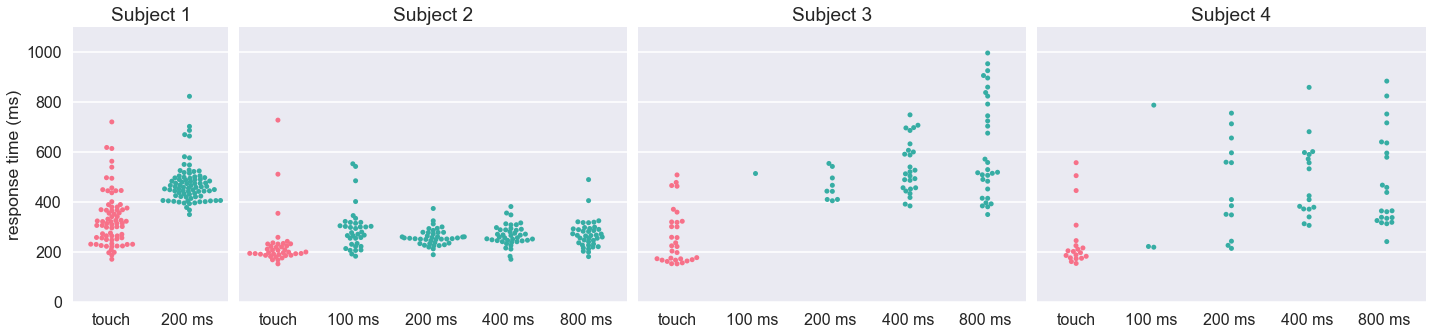

In [126]:
frameIndividual = sns.FacetGrid(data=dataCleaned,col='Subject',size=5, aspect=1,sharex=False,sharey=True,gridspec_kws={"width_ratios": [2, 5, 5, 5]})
#frameIndividual.map(sns.swarmplot,'experiment','response time (ms)','typeOrder')

frameIndividual.map(sns.swarmplot,"experiment","response time (ms)",'typeOrder',palette='husl')
frameIndividual.axes[0,0].set_xlabel('')
frameIndividual.axes[0,1].set_xlabel('')
frameIndividual.axes[0,2].set_xlabel('')
frameIndividual.axes[0,3].set_xlabel('')

#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,1100])

frameIndividual.axes[0,0].set_title('Subject 1')
frameIndividual.axes[0,1].set_title('Subject 2')
frameIndividual.axes[0,2].set_title('Subject 3')
frameIndividual.axes[0,3].set_title('Subject 4')


if saveFig:
    figIndividual.savefig('swarmBySid_col_4subj_ND_CP.svg', dpi=600)
    figIndividual.savefig('swarmBySid_col_4subj_ND_CP.png', dpi=600)


### test for normality using Anderson-Darling test


In [124]:
groupedData = dataCleaned.groupby(['Subject','experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['response time (ms)']),dist='norm'))

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1779: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1865: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Subject  experiment
1        200 ms        (3.3470004945771166, [0.551, 0.627, 0.753, 0.8...
         touch         (1.6557435579501174, [0.549, 0.625, 0.749, 0.8...
2        100 ms        (1.8167321892879045, [0.528, 0.601, 0.721, 0.8...
         200 ms        (0.7539002991675972, [0.531, 0.605, 0.726, 0.8...
         400 ms        (0.5029204538590761, [0.531, 0.605, 0.726, 0.8...
         800 ms        (1.0236325191185855, [0.531, 0.605, 0.726, 0.8...
         touch         (6.629202168079317, [0.529, 0.603, 0.723, 0.84...
3        100 ms        (nan, [-0.029, -0.033, -0.039, -0.046, -0.055]...
         200 ms        (0.43133155762296127, [0.507, 0.578, 0.693, 0....
         400 ms        (0.5237568161582082, [0.516, 0.587, 0.705, 0.8...
         800 ms        (1.09192914331922, [0.522, 0.595, 0.713, 0.832...
         touch         (1.5854268215315592, [0.521, 0.593, 0.712, 0.8...
4        100 ms        (0.48284270205007074, [-1.296, -1.476, -1.771,...
         200 ms        (0.35586

In [128]:
import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['response time (ms)'])))

C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\djcald.CSENETID\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & co

Subject  experiment
1        200 ms        (3.3470004945771734, 1.8875157287817827e-08)
         touch          (1.655743557950089, 0.00027247630773446894)
2        100 ms         (1.8167321892879045, 9.631213878662753e-05)
         200 ms           (0.7539002991675972, 0.04568123935385427)
         400 ms           (0.5029204538590761, 0.19380023581993663)
         800 ms          (1.0236325191185642, 0.009583365749422128)
         touch         (6.6292021680795585, 1.3987768418889382e-16)
3        100 ms                                          (nan, 0.0)
         200 ms           (0.4313315576229595, 0.23456776837305296)
         400 ms           (0.5237568161582082, 0.16548429947482085)
         800 ms            (1.09192914331922, 0.006206441230963265)
         touch          (1.5854268215315592, 0.0003501844753966829)
4        100 ms           (0.48284270205007074, 0.0589322563380666)
         200 ms          (0.35586303126683205, 0.40106903701190494)
         400 ms           (0